In [8]:
# Import libraries
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter

In [9]:
# Define the folder containing the CSV files
folder_path='C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)'

# Get list of all CSV files in the folder
csv_files=glob.glob(os.path.join(folder_path,'*.csv'))

# Display filenames to confirm
print(csv_files)

['C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)\\cars_2015.csv', 'C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)\\cars_2016.csv', 'C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)\\cars_2017.csv', 'C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)\\cars_2018.csv', 'C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)\\cars_2019.csv', 'C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)\\cars_2020.csv', 'C:/Users/Thinktechniq/Desktop/Forward College Data Analytics/Capstone Project/Datasets (MY Vehicle Registration_2015 to 2025)\\cars_20

In [10]:
# Create a list of Dataframes
df_list=[pd.read_csv(file) for file in csv_files]

# Combine all into one DataFrame
combined_df=pd.concat(df_list, ignore_index=True)

# Preview the result
combined_df.head()

date_reg     type      maker     model colour         fuel       state
0  2015-01-01  motokar       Audi        A4  black       petrol       Johor
1  2015-01-01  pick_up  Chevrolet  Colorado  white  greendiesel       Johor
2  2015-01-01      jip       Ford  Ecosport  white       petrol       Johor
3  2015-01-01      jip       Ford  Ecosport   grey       petrol  Terengganu
4  2015-01-01  motokar       Ford    Fiesta    red       petrol  Terengganu

In [11]:
# Inspect data
print(combined_df.columns.tolist())
print("\n")
print(combined_df.shape)
print("\n")
print(combined_df.info())
print("\n")
print(combined_df.describe())
print("\n")
print(combined_df["type"].unique())
print("\n")
print(combined_df["maker"].unique())
print("\n")
print(combined_df["fuel"].unique())

['date_reg', 'type', 'maker', 'model', 'colour', 'fuel', 'state']


(6980488, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980488 entries, 0 to 6980487
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   date_reg  object
 1   type      object
 2   maker     object
 3   model     object
 4   colour    object
 5   fuel      object
 6   state     object
dtypes: object(7)
memory usage: 372.8+ MB
None


         date_reg     type    maker    model   colour     fuel        state
count     6980485  6980485  6980485  6980485  6980485  6980485      6980485
unique       3788        6      151     1098       16       14           17
top     2/28/2025  motokar  Perodua     Axia    white   petrol  Rakan Niaga
freq        14838  4493589  2639937   757707  1671316  6258012      5671464


['motokar' 'pick_up' 'jip' 'window_van' 'motokar_pelbagai_utiliti'
 'multipurpose_passenger_car' nan]


['Audi' 'Chevrolet' 'Ford' 'Foton' 'Honda' 'Hyundai' 'Inokom' 'Isuzu'
 '

In [12]:
# Replace "multipurpose_passenger_car" with "motokar_pelbagai_utiliti"
combined_df["type"]=combined_df["type"].replace({
    "motokar":"motorcar",
    "pick-up":"pick-up truck",
    "jip":"jeep",
    "window_van":"window_van",
    "motokar_pelbagai_utiliti":"multi_purpose_vehicle",
    "multipurpose_passenger_car":"multi_purpose_vehicle"
})

In [17]:
# Transform data

# [Total registration by type]
type_total=combined_df["type"].value_counts()
print(type_total)

# [Total registration by maker]
maker_total=combined_df["maker"].value_counts()
print(maker_total)

# [Total registration by fuel]
fuel_total=combined_df["fuel"].value_counts()
print(fuel_total)

# Convert "date" column to date type
combined_df['date_reg'] = pd.to_datetime(combined_df['date_reg'], format='mixed', dayfirst=False, errors='coerce')
combined_df['date_reg'] = combined_df['date_reg'].astype(str).str.strip().str.replace('/', '-')
combined_df['date_reg'] = pd.to_datetime(combined_df['date_reg'], errors='coerce')

# Create a "year_reg" column
combined_df["year_reg"]=combined_df["date_reg"].dt.year


type
motorcar                 4493589
jeep                     1167928
multi_purpose_vehicle     568597
pick_up                   472252
window_van                278119
Name: count, dtype: int64
maker
Perodua         2639937
Proton          1133012
Toyota          1052039
Honda            891856
Nissan           219678
                 ...   
Ruf                   1
Allenbus              1
AK Sportscar          1
Datsun                1
Togg                  1
Name: count, Length: 151, dtype: int64
fuel
petrol            6258012
greendiesel        510161
hybrid_petrol      116533
electric            55865
diesel              33338
petrol_ng            3723
hybrid_diesel        2774
petrol_lng             44
other                  13
greendiesel_ng         11
ng                      4
hydrogen                3
lng                     2
diesel_ng               2
Name: count, dtype: int64


In [18]:
# Filter the dataframe for only EV cars
fuel_type='electric'
df_EV_car_type=combined_df[combined_df["fuel"]==fuel_type]

# Pivot table showing registrations by car type and year
pivot_EV_type=pd.pivot_table(
    data=df_EV_car_type,
    index='type',
    columns='year_reg',
    aggfunc='size',
    fill_value=0
)

# ✅ Rename car types
type_rename_map = {
    'jeep': 'SUV',
    'motorcar': 'Sedan',
    'multi_purpose_vehicle': 'MPV',
    'pick_up': 'Pick-Up',
    'window_van': 'Window Van'
}
pivot_EV_type.rename(index=type_rename_map, inplace=True)

print(pivot_EV_type)

# Pivot table showing the proportion of registrations by car type from 2015 to 2025
pivot_proportion_EV_type=pivot_EV_type.div(pivot_EV_type.sum(axis=0),axis=1)
pivot_percentage_EV_type=pivot_proportion_EV_type*100
print(pivot_percentage_EV_type.round(2))


year_reg    2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  2022.0  \
type                                                                         
SUV              0       0       0       3       3       1       3    2017   
Sedan           55      41      25       7      39      68     254    1103   
MPV              0       0       0       0       2       2       0       2   
Pick-Up          0       0       0       0       0       0       0       0   
Window Van       0       0       0       0       0       0       0       7   

year_reg    2023.0  2024.0  2025.0  
type                                
SUV           6835    7666   10328  
Sedan         6403   13377    4596  
MPV              1     566     977  
Pick-Up         48      54       4  
Window Van      14     126    1238  
year_reg    2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  2022.0  \
type                                                                         
SUV            0.0     0.0     0.0    

year_reg    2015.0  2016.0  2017.0  2018.0    2019.0    2020.0    2021.0  \
type                                                                       
Sedan          1.0     1.0     1.0     0.7  0.886364  0.957746  0.988327   
SUV            0.0     0.0     0.0     0.3  0.068182  0.014085  0.011673   
MPV            0.0     0.0     0.0     0.0  0.045455  0.028169  0.000000   
Window Van     0.0     0.0     0.0     0.0  0.000000  0.000000  0.000000   
Pick-Up        0.0     0.0     0.0     0.0  0.000000  0.000000  0.000000   

year_reg      2022.0    2023.0    2024.0    2025.0  
type                                                
Sedan       0.352509  0.481392  0.613934  0.268098  
SUV         0.644615  0.513871  0.351829  0.602462  
MPV         0.000639  0.000075  0.025976  0.056991  
Window Van  0.002237  0.001053  0.005783  0.072216  
Pick-Up     0.000000  0.003609  0.002478  0.000233  


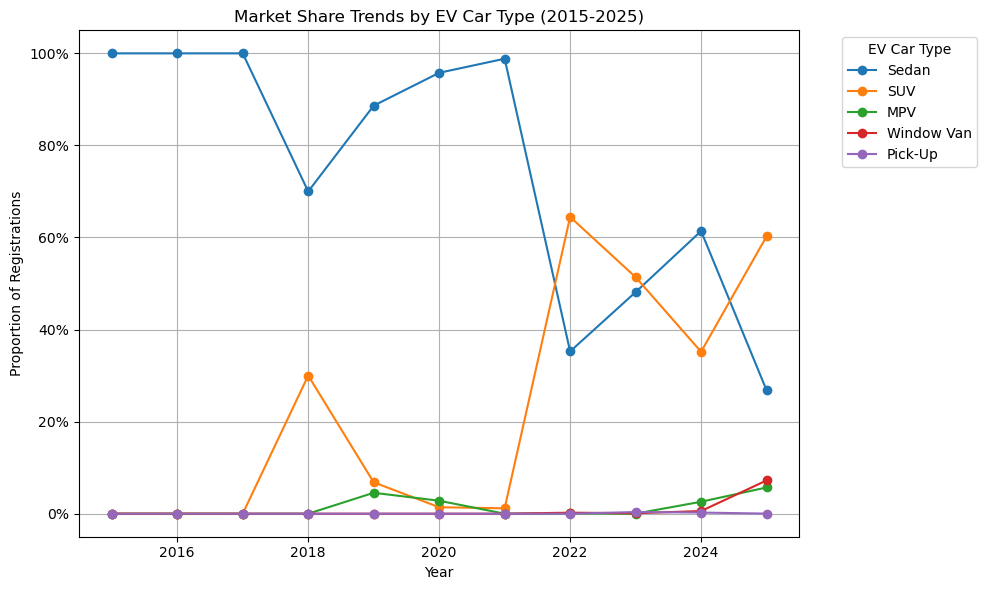

In [19]:
# Plot top 10 registrations from 2015 to 2025 (by EV car types)
top_types=pivot_proportion_EV_type.sum(axis=1).sort_values(ascending=False).index
pivot_proportion_EV_type.loc[top_types].T.plot(figsize=(10,6),marker='o')

print(pivot_proportion_EV_type.loc[top_types].head())

# Static line chart
plt.title("Market Share Trends by EV Car Type (2015-2025)")
plt.xlabel("Year")
plt.ylabel("Proportion of Registrations")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.grid(True)
plt.legend(title="EV Car Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
# Plot proportion of registrations from 2015 to 2025 (by car type)
top_EV_car_types=pivot_proportion_EV_type.sum(axis=1).sort_values(ascending=False).head(5).index
top_5_EV_type_df=pivot_proportion_EV_type.loc[top_EV_car_types]
df_plot_type=top_5_EV_type_df.T.reset_index().melt(
    id_vars='year_reg',
    var_name='type',
    value_name='proportion'
)

# Interactive line chart
fig=px.line(
    df_plot_type,
    x='year_reg',
    y='proportion',
    color='type',
    title='Interactive Market Share Trends by EV Car Types (2015-2025)',
    markers=True,
    hover_name='type',
    hover_data={'proportion':':.2%'}
)

fig.update_layout(
    xaxis_title='Type',
    yaxis_title='Proportion of Registrations',
    yaxis_tickformat='.0%',
    hovermode='x unified'
)

fig.show()

In [21]:
# Pivot table showing registrations by fuel type and year 
pivot_fuel=pd.pivot_table(
    data=combined_df,
    index="fuel",
    columns="year_reg",
    values="date_reg",
    aggfunc="count",
    fill_value=0
)

print(pivot_fuel)

# Pivot table showing the proportion of registrations by fuel type from 2015 to 2025
pivot_proportion_fuel=pivot_fuel.div(pivot_fuel.sum(axis=0),axis=1)
pivot_percentage_fuel=pivot_proportion_fuel*100
print(pivot_percentage_fuel.round(2))

year_reg        2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  \
fuel                                                                     
diesel            2033    1403    1867    3416    3102    2433    2238   
diesel_ng            0       1       0       0       0       0       0   
electric            55      41      25      10      44      71     257   
greendiesel      58821   49084   45696   49434   40008   35254   41266   
greendiesel_ng       1       0       1       0       0       1       2   
hybrid_diesel     2690      44       6       6       4       1       1   
hybrid_petrol     6953    5812    9143    7743    5962    1927    2730   
hydrogen             0       0       0       0       2       1       0   
lng                  2       0       0       0       0       0       0   
ng                   3       0       0       1       0       0       0   
other                0       0       1       1       7       3       0   
petrol          605993  529963  522731

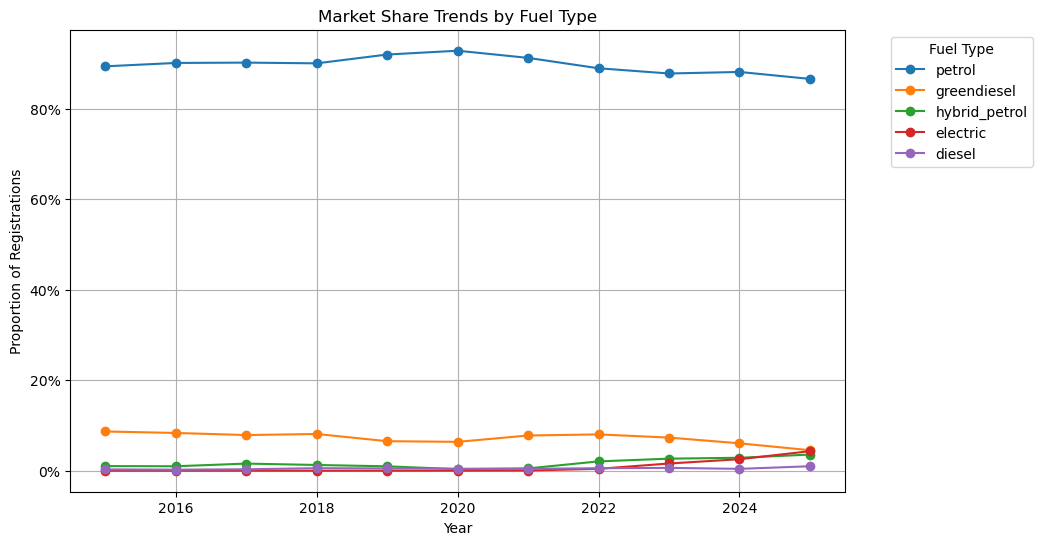

In [22]:
# Plot proportion of registrations from 2015 to 2025 (by fuel types)
top_fuel = pivot_proportion_fuel.sum(axis=1).sort_values(ascending=False).head(5).index
pivot_proportion_fuel.loc[top_fuel].T.plot(figsize=(10,6), marker='o')

# Static line chart
plt.title("Market Share Trends by Fuel Type")
plt.xlabel("Year")
plt.ylabel("Proportion of Registrations")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.grid(True)
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [23]:
# Interactive line chart
df_plot_fuel = (
    pivot_proportion_fuel.loc[top_fuel]
    .T
    .reset_index()
    .melt(id_vars='year_reg', var_name='fuel', value_name='proportion')
)

print(df_plot_fuel.head())

fig = px.line(
    df_plot_fuel,
    x='year_reg',
    y='proportion',
    color='fuel',
    title='Interactive Market Share Trends by Fuel Type (2015–2025)',
    markers=True,
    hover_name='fuel',
    hover_data={'proportion': ':.2%'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Proportion of Registrations',
    yaxis_tickformat='.0%',
    hovermode='x unified'
)

fig.show()

   year_reg    fuel  proportion
0    2015.0  petrol    0.893643
1    2016.0  petrol    0.901105
2    2017.0  petrol    0.901834
3    2018.0  petrol    0.900239
4    2019.0  petrol    0.919700


In [24]:
# Filter the dataframe for only EV cars
fuel_type='electric'
df_EV_maker=combined_df[combined_df["fuel"]==fuel_type]

# Pivot table showing registrations EV car makers and year
pivot_EV_maker=pd.pivot_table(
    data=df_EV_maker,
    index="maker",
    columns="year_reg",
    aggfunc="size",
    fill_value=0
)

print(pivot_EV_maker)

year_reg          2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  \
maker                                                                      
Allenbus               0       0       0       0       0       0       0   
Audi                   0       0       0       0       0       0       2   
BMW                    0       0       1       0       5       7       4   
BYD                    0       0       0       0       2       0       0   
Borgward               0       0       0       0       0       1       0   
Cam                    0       0       0       0       0       0       0   
Chery                  0       0       0       0       0       0       0   
Citroen                0       0       0       0       0       0       0   
DFSK                   0       0       0       0       0       0       1   
Denza                  0       0       0       0       0       0       0   
Dong Feng              0       0       0       0       0       0       0   
Fiat        

In [25]:
# Pivot table showing the proportion of registrations by EV car maker from 2015 to 2025
pivot_proportion_EV_maker=pivot_EV_maker.div(pivot_EV_maker.sum(axis=0),axis=1)
pivot_percentage_EV_maker=pivot_proportion_EV_maker*100
print(pivot_percentage_EV_maker.round(2))

year_reg          2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  \
maker                                                                      
Allenbus            0.00    0.00     0.0     0.0    0.00    0.00    0.00   
Audi                0.00    0.00     0.0     0.0    0.00    0.00    0.78   
BMW                 0.00    0.00     4.0     0.0   11.36    9.86    1.56   
BYD                 0.00    0.00     0.0     0.0    4.55    0.00    0.00   
Borgward            0.00    0.00     0.0     0.0    0.00    1.41    0.00   
Cam                 0.00    0.00     0.0     0.0    0.00    0.00    0.00   
Chery               0.00    0.00     0.0     0.0    0.00    0.00    0.00   
Citroen             0.00    0.00     0.0     0.0    0.00    0.00    0.00   
DFSK                0.00    0.00     0.0     0.0    0.00    0.00    0.39   
Denza               0.00    0.00     0.0     0.0    0.00    0.00    0.00   
Dong Feng           0.00    0.00     0.0     0.0    0.00    0.00    0.00   
Fiat        

Index(['Tesla', 'Renault', 'Nissan', 'BYD', 'BMW', 'Porsche', 'Mini', 'Proton',
       'Volvo', 'Mercedes Benz'],
      dtype='object', name='maker')


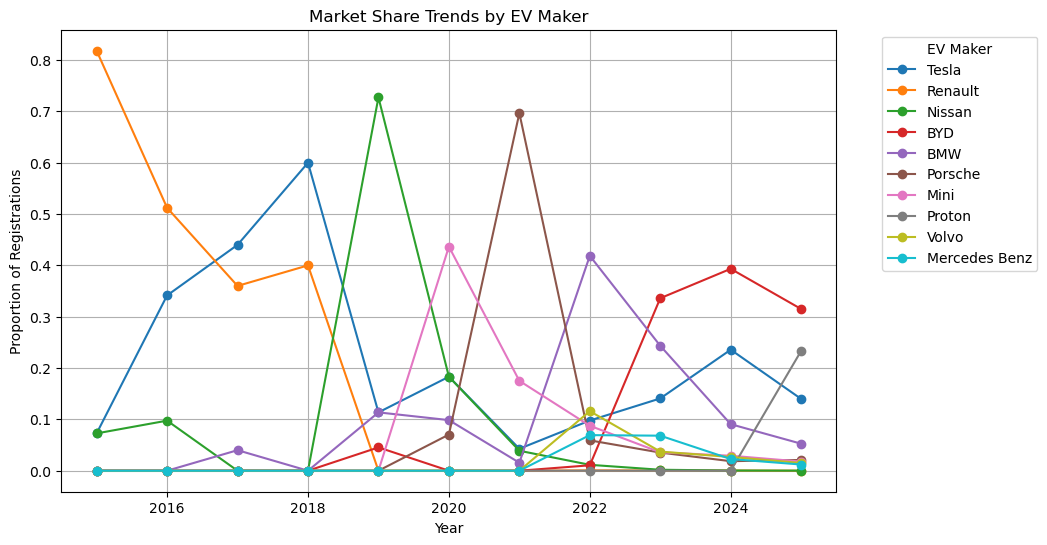

In [26]:
# Plot proportion of registrations from 2015 to 2025 (by EV makers)
top_EV_makers=pivot_proportion_EV_maker.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_proportion_EV_maker.loc[top_EV_makers].T.plot(figsize=(10,6),marker='o')

print(top_EV_makers)

plt.title("Market Share Trends by EV Maker")
plt.xlabel("Year")
plt.ylabel("Proportion of Registrations")
plt.grid(True)
plt.legend(title="EV Maker", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
# Interactive line chart
df_plot_EV_maker=(
    pivot_proportion_EV_maker.loc[top_EV_makers]
    .T
    .reset_index()
    .melt(id_vars='year_reg',var_name='maker',value_name='proportion')
)

fig=px.line(
    df_plot_EV_maker,
    x='year_reg',
    y='proportion',
    color='maker',
    title='Interactive Market Share Trends for EV Makers (2015-2025)',
    markers=True,
    hover_name='maker',
    hover_data={'proportion':':.2%'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Proportion of Registrations',
    yaxis_tickformat='.0%'
)

fig.show()

In [28]:
# Pivot table showing registrations across Malaysian states
pivot_state=pd.pivot_table(
    data=combined_df,
    index="state",
    columns="year_reg",
    values="date_reg",
    aggfunc='count',
    fill_value=0
)

print(pivot_state)

# Pivot table showing the proportion of registrations across Malaysian states
pivot_proportion_state=pivot_state.div(pivot_state.sum(axis=0),axis=1)
pivot_percentage_state=pivot_proportion_state*100
print(pivot_percentage_state.round(2))


year_reg           2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  \
state                                                                       
Johor               23548   16248   11022   10763    8118    9205    9261   
Kedah                6446    4734    3845    3523    3376    3148    2462   
Kelantan             5529    3097    2203    2195    1929    2363    2098   
Melaka               5939    4342    2565    2077    1245    1797    1778   
Negeri Sembilan      4707    2704    1837    1780    1327    1350    1302   
Pahang               6502    4578    2805    2542    2068    2496    2406   
Perak                9961    5908    3892    3431    2383    2831    2598   
Perlis               1038     737     433     256     250     410     393   
Pulau Pinang        17701   11552    7413    4984    2914    3481    3101   
Rakan Niaga        435596  429835  464210  494493  509603  467515  453488   
Sabah               19609   13088   10823   11210   10070    6743    6621   

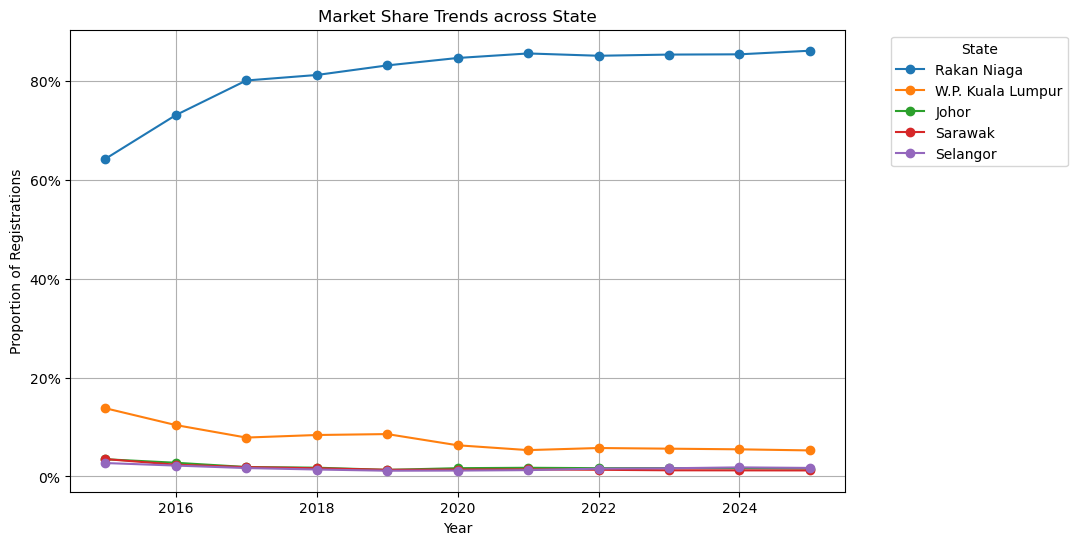

In [29]:
# Plot proportion of registrations from 2015 to 2025 (across Malaysian states)
top_state=pivot_proportion_state.sum(axis=1).sort_values(ascending=False).head(5).index
pivot_proportion_state.loc[top_state].T.plot(figsize=(10,6),marker='o')

# Static line chart
plt.title("Market Share Trends across State")
plt.xlabel("Year")
plt.ylabel("Proportion of Registrations")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1,0))
plt.grid(True)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
# Interactive line chart
df_plot_state=(
    pivot_proportion_state.loc[top_state].T.reset_index().melt(id_vars='year_reg',var_name='state',value_name='proportion')
)

fig=px.line(
    df_plot_state,
    x='year_reg',
    y="proportion",
    color='state',
    title='Interactive Market Share Trends across States (2015-2025)',
    markers=True,
    hover_name='state',
    hover_data={'proportion':':.2%'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Proportion of Registrations',
    yaxis_tickformat='.0%'
)

fig.show()

Registration Count by Region:
year_reg  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  2022.0  \
origin                                                                     
China          0       0       0       0       2       0       1      50   
Foreign       55      41      25      10      42      71     256    3079   
Malaysia       0       0       0       0       0       0       0       0   

year_reg  2023.0  2024.0  2025.0  
origin                            
China       5170   11209    8192  
Foreign     8131   10580    4948  
Malaysia       0       0    4003  
Market Share by Region (%):
year_reg  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  2022.0  \
origin                                                                     
China        0.0     0.0     0.0     0.0    4.55     0.0    0.39     1.6   
Foreign    100.0   100.0   100.0   100.0   95.45   100.0   99.61    98.4   
Malaysia     0.0     0.0     0.0     0.0    0.00     0.0    0.00     0.0   

year_

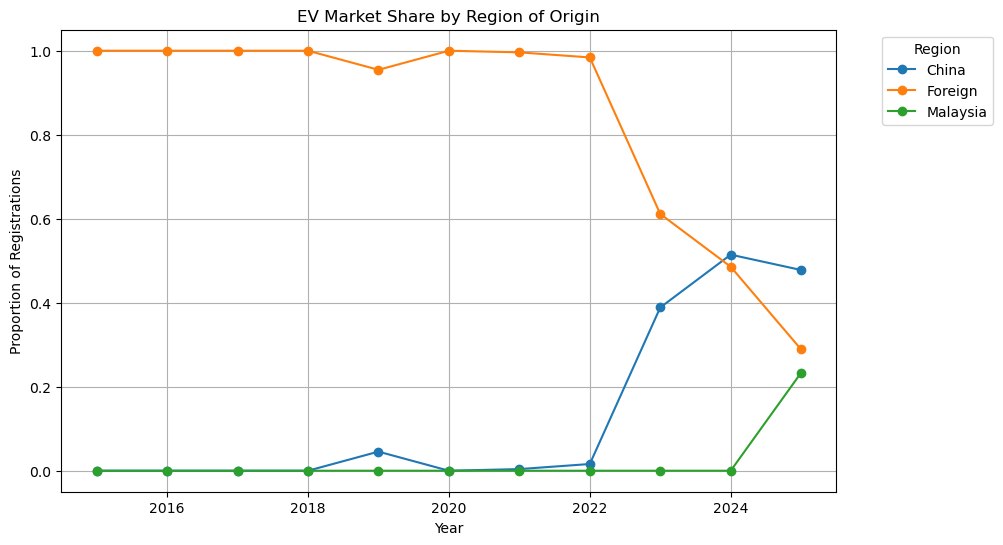

In [31]:
# Define brand categories
chinese_brands = [
    "BAIC", "BAW", "BYD", "Chery", "Denza", "Dong Feng", "Foday", "Foton",
    "GAC", "GAC Aion", "GAC Hyptec", "Great Wall", "Higer", "JAC", "Jetour",
    "JMC", "King Long Xiamen", "Leapmotor", "Maxus", "Neta", "Shineray",
    "Smart", "Xinneng", "Xpeng", "Zeekr", "ZXAuto"
]
local_brands = ["Proton", "Perodua"]

# Filter the dataframe for EVs only
fuel_type = 'electric'
df_EV_maker = combined_df[combined_df["fuel"] == fuel_type].copy()

# Assign region category to each maker
def categorize_maker(maker):
    if maker in chinese_brands:
        return 'China'
    elif maker in local_brands:
        return 'Malaysia'
    else:
        return 'Foreign'

df_EV_maker['origin'] = df_EV_maker['maker'].apply(categorize_maker)

# Pivot table showing registration counts by origin and year
pivot_EV_origin = pd.pivot_table(
    data=df_EV_maker,
    index='origin',
    columns='year_reg',
    aggfunc='size',
    fill_value=0
)

print("Registration Count by Region:")
print(pivot_EV_origin)

# Calculate proportion of registrations by origin
pivot_proportion_EV_origin = pivot_EV_origin.div(pivot_EV_origin.sum(axis=0),axis=1)
pivot_percentage_EV_origin = pivot_proportion_EV_origin*100

print("Market Share by Region (%):")
print(pivot_percentage_EV_origin.round(2))

# Plot proportion of registrations from 2015 to 2025 (by region)
pivot_proportion_EV_origin.T.plot(figsize=(10,6),marker='o')

plt.title("EV Market Share by Region of Origin")
plt.xlabel("Year")
plt.ylabel("Proportion of Registrations")
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("chart_region.png", dpi=300, bbox_inches='tight')
plt.show()

# Interactive line chart
df_plot_EV_origin=(
    pivot_proportion_EV_origin
    .T
    .reset_index()
    .melt(id_vars='year_reg',var_name='origin',value_name='proportion')
)

fig = px.line(
    df_plot_EV_origin,
    x='year_reg',
    y='proportion',
    color='origin',
    title='Interactive EV Market Share by Region (2015–2025)',
    markers=True,
    hover_name='origin',
    hover_data={'proportion': ':.2%'}
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Proportion of Registrations',
    yaxis_tickformat='.0%'
)

fig.show()

year_reg  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  2022.0  \
model                                                                      
Model S        4      14      10       3       1       4       1       4   
Leaf           4       4       0       0      32      13      10      35   
Zoe           15      16       6       2       0       0       0       2   
Twizy         30       5       3       2       0       0       0       0   
Taycan         0       0       0       0       0       5     179     185   
Cooper         0       0       0       0       0      31      45     274   
Model 3        0       0       0       0       0       6      10     186   
Atto 3         0       0       0       0       0       0       0      33   
iX             0       0       0       0       0       0       0     976   
Model X        0       0       0       3       3       3       0      28   
i3             0       0       1       0       4       7       4      13   
Model Y     

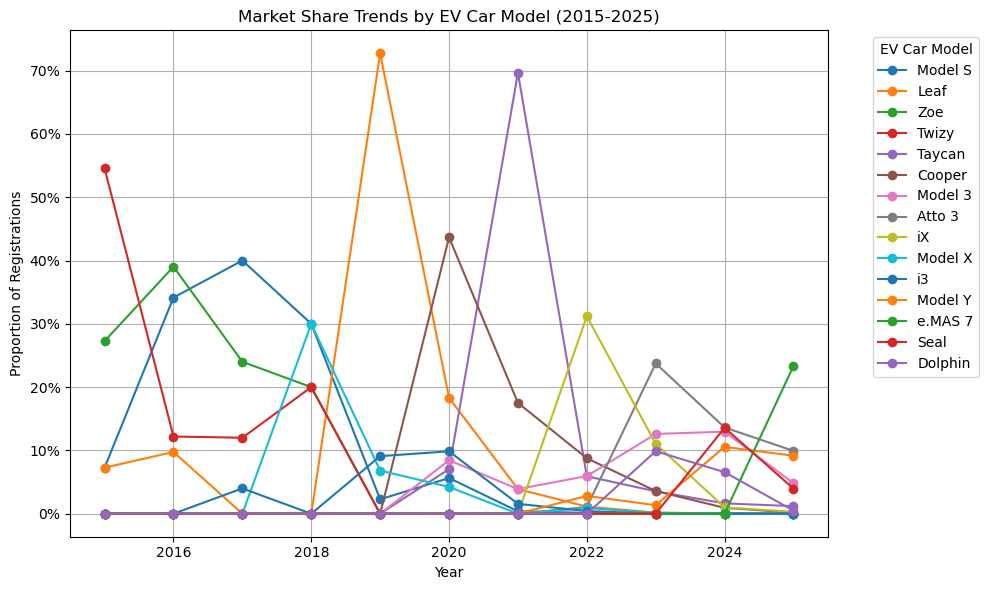

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.express as px

# Filter EV dataset
df_ev = combined_df[combined_df['fuel'] == 'electric']

# Function to process and plot top 15 models
def plot_top_models(df, title_suffix):
    # Pivot table: registrations by model and year
    pivot_model = pd.pivot_table(
        data=df,
        index="model",
        columns="year_reg",
        aggfunc="size",
        fill_value=0
    )

    # Proportions
    pivot_proportion_model = pivot_model.div(pivot_model.sum(axis=0), axis=1)

    # Get top 15 models by total proportion
    top_15_models = pivot_proportion_model.sum(axis=1).sort_values(ascending=False).head(15).index

    # Filter pivot table to only top 15 models (display registration counts)
    top_15_models_pivot=pivot_model.loc[top_15_models]
    print(top_15_models_pivot)

    # Filter pivot table to only top 15 models (display proportion)
    top_15_models_proportion_pivot=pivot_proportion_model.loc[top_15_models]
    print(top_15_models_proportion_pivot)
    
    #Static line chart
    pivot_proportion_model.loc[top_15_models].T.plot(figsize=(10,6), marker='o')

    plt.title(f'Market Share Trends by {title_suffix} Model (2015-2025)')
    plt.xlabel("Year")
    plt.ylabel("Proportion of Registrations")
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
    plt.grid(True)
    plt.legend(title=f'{title_suffix} Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    filename=f"chart_{title_suffix.lower().replace(' ','_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Prepare data for interactive plot
    df_plot_model = (
        pivot_proportion_model.loc[top_15_models]
        .T
        .reset_index()
        .melt(id_vars='year_reg', var_name='model', value_name='proportion')
    )

    # Interactive line chart
    fig = px.line(
        df_plot_model,
        x='year_reg',
        y='proportion',
        color='model',
        title=f'Market Share Trends for Top 15 {title_suffix} Models',
        markers=True,
        hover_name='model',
        hover_data={'proportion': ':.2%'}
    )

    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Proportion of Registrations',
        yaxis_tickformat='.0%',
        hovermode='x unified'
    )

    fig.show()

# Plot for EVs
plot_top_models(df_ev, "EV Car")


In [35]:
# Filter the Petrol & EV data
df_petrol = combined_df[combined_df['fuel'] == 'petrol']
df_ev = combined_df[combined_df['fuel'] == 'electric']

# Pivot table for petrol models by year
pivot_petrol_model = pd.pivot_table(
    data=df_petrol,
    index='model',
    columns='year_reg',
    aggfunc='size',
    fill_value=0
)
pivot_proportion_petrol = pivot_petrol_model.div(pivot_petrol_model.sum(axis=0), axis=1)

# Get top 10 petrol models (based on total market share from 2015 to 2025)
top_10_petrol_models = (
    pivot_proportion_ev.sum(axis=1)
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

print("Top 10 Petrol models (2015–2025):")
print(top_10_petrol_models)

#--
# Pivot table for EV models by year
pivot_ev_model = pd.pivot_table(
    data=df_ev,
    index='model',
    columns='year_reg',
    aggfunc='size',
    fill_value=0
)
pivot_proportion_ev = pivot_ev_model.div(pivot_ev_model.sum(axis=0), axis=1)

# Get top 10 EV models (based on total market share from 2015 to 2025)
top_10_ev_models = (
    pivot_proportion_ev.sum(axis=1)
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

print("Top 10 EV models (2015–2025):")
print(top_10_ev_models)

Top 10 Petrol models (2015–2025):
['Model S', 'Leaf', 'Zoe', 'Twizy', 'Taycan', 'Cooper', 'Model 3', 'Atto 3', 'iX', 'Model X']
Top 10 EV models (2015–2025):
['Model S', 'Leaf', 'Zoe', 'Twizy', 'Taycan', 'Cooper', 'Model 3', 'Atto 3', 'iX', 'Model X']


In [37]:
# Map the top 10 models with their prices

model_price_dict = {
    'Axia':	22000,
    'Myvi': 46500,
    'Bezza': 34580,
    'Saga': 34800,
    'City': 84900,
    'Alza': 62500,
    'Vios': 89600,
    'Hilux': 103880,
    'Persona': 44600,
    'HR-V':	115900,
    'Leaf': 168888,
    'Zoe': 165000,
    'Taycan': 575000,
    'Cooper': 193888,
    'Model 3':	189000,
    'Atto 3': 123800,
    'iX': 385430,
    'Ativa': 71200,
    'Model X': 238000,
    'Twizy': 71888,
    'Model S': 339000
}

# Create cleaned version of model_price_dict
cleaned_model_price_dict = {
    k.strip().replace('\u202f', ' ').replace('\xa0', ' '): v
    for k, v in model_price_dict.items()
}

# Add the price column to the dataframe by mapping model names
combined_df['price'] = combined_df['model'].map(cleaned_model_price_dict)

# [Calculate median price for top 10 Petrol car models]
# Count registrations for each top model
top_10_petrol_model_counts = combined_df[combined_df['model'].isin(top_10_petrol_models)]['model'].value_counts()
print(top_10_petrol_model_counts)

# Step 2: Get corresponding prices
top_10_petrol_model_prices = top_10_petrol_model_counts.index.to_series().map(cleaned_model_price_dict)
print(top_10_petrol_model_prices)

# Step 3: Expand the prices by their registration counts
top_10_petrol_model_weighted_prices = []
for model, count in top_10_petrol_model_counts.items():
    price = cleaned_model_price_dict.get(model)
    if price is not None:
        top_10_petrol_model_weighted_prices.extend([price] * count)

# Step 4: Compute the median of the expanded list
top_10_petrol_model_weighted_median_price = np.median(top_10_petrol_model_weighted_prices)

print(f"Weighted median price among top 10 petrol models: RM {top_10_petrol_model_weighted_median_price:,.2f}")

model
Atto 3     7860
Cooper     6589
Model 3    5527
iX         2711
Taycan     1400
Leaf        133
Model X      64
Zoe          53
Model S      48
Twizy        42
Name: count, dtype: int64
model
Atto 3     123800
Cooper     193888
Model 3    189000
iX         385430
Taycan     575000
Leaf       168888
Model X    238000
Zoe        165000
Model S    339000
Twizy       71888
Name: model, dtype: int64
Weighted median price among top 10 petrol models: RM 189,000.00


In [38]:
# # [Calculate median price for top 10 EV models]

# # Count registration for each top EV model
# top_ev_model_counts=combined_df[combined_df['model'].isin(top_10_ev_models)]['model'].value_counts()
# top_ev_model_counts.index = top_ev_model_counts.index.str.strip().str.replace('\u202f', ' ').str.replace('\xa0', ' ')

# print(top_ev_model_counts)

# # Normalize model names for matching
# top_ev_model_counts.index = top_ev_model_counts.index.str.strip().str.replace('\u202f', ' ').str.replace('\xa0', ' ')

# # Map model names with their registration counts to prices
# top_ev_model_prices = top_ev_model_counts.index.to_series().map(cleaned_model_price_dict)
# print(top_ev_model_prices)

# # Compute the median of the expanded list
# top_ev_model_weighted_median_price=np.median(top_ev_model_prices)

# print(f"Weighted median price among top 10 EV models: RM {top_ev_model_weighted_median_price:,.2f}")

In [39]:
# Count registrations for each top EV model
top_ev_model_counts = combined_df[combined_df['model'].isin(top_10_ev_models)]['model'].value_counts()

# Normalize model names (remove weird spaces and non-breaking spaces)
top_ev_model_counts.index = (
    top_ev_model_counts.index
    .str.strip()
    .str.replace('\u202f', ' ')
    .str.replace('\xa0', ' ')
)

# Map model names to their prices
top_ev_model_prices = top_ev_model_counts.index.to_series().map(cleaned_model_price_dict)

# Combine into a DataFrame
ev_model_table = pd.DataFrame({
    'Registrations': top_ev_model_counts.values,
    'Price (RM)': top_ev_model_prices.values
}, index=top_ev_model_counts.index)

# Optional: sort by registration count
ev_model_table = ev_model_table.sort_values(by='Registrations', ascending=False)

# Display the table
print(ev_model_table)

# Compute weighted median price
top_ev_model_weighted_median_price = np.median(top_ev_model_prices)

print(f"\nWeighted median price among top 10 EV models: RM {top_ev_model_weighted_median_price:,.2f}")


         Registrations  Price (RM)
model                             
Atto 3            7860      123800
Cooper            6589      193888
Model 3           5527      189000
iX                2711      385430
Taycan            1400      575000
Leaf               133      168888
Model X             64      238000
Zoe                 53      165000
Model S             48      339000
Twizy               42       71888

Weighted median price among top 10 EV models: RM 191,444.00


## Scraper with Stealth to extract reviews and comments about purchasing an EV

1. Install dependencies

In [40]:
# !pip install undetected-chromedriver selenium-stealth fake-useragent nltk wordcloud matplotlib

2. Import libraries

In [41]:
import undetected_chromedriver as uc
from selenium_stealth import stealth
from fake_useragent import UserAgent
from selenium.webdriver.common.by import By
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time, random

Download NLTK Resources

In [42]:
# Download the NLTK stopwords corpus (common words to ignore, e.g., "the", "is", "and")
nltk.download('stopwords')

# Download the NLTK punkt tokenizer models (used for splitting text into words/sentences)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thinktechniq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thinktechniq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

3. Configure Stealth Chrome

In [44]:
# Random User-Agent
ua = UserAgent()
options = uc.ChromeOptions()
options.add_argument(f"--user-agent={ua.random}")
options.add_argument("--disable-blink-features=AutomationControlled")

# Launch undetected Chrome
# These options help to avoid detection by websites that block automated browsers
# Can be changed
driver = uc.Chrome(version_main=138,options=options)
stealth(
    driver,
    languages=["en-US","en"],
    vendor="Google Inc.",
    platform="Win32",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
)
driver.maximize_window()

4. Human-like helpers

In [45]:
def human_pause(min_s=1, max_s=3):
    time.sleep(random.uniform(min_s, max_s))

5. Scrape Reddit comments

In [46]:
url='https://www.reddit.com/r/malaysia/comments/1icp5e2/are_ev_cars_practical_in_malaysia/'
driver.get(url)
human_pause(3,5)

In [47]:
# Scroll and extract all comments
ev_comments = []
last_count = -1

while True:
    # Find comment blocks using scalable-text (avoid classes with colons)
    comment_blocks = driver.find_elements(By.CSS_SELECTOR, 'div.py-0.inline-block.scalable-text')

    comments_batch = []
    for block in comment_blocks:
        try:
            # Get all text from inside this comment block
            comment_text = block.text.strip()
            if comment_text and comment_text not in ev_comments:
                comments_batch.append(comment_text)
        except:
            continue

    # Append new batch to full list
    ev_comments.extend(comments_batch)

    print(f'Found {len(ev_comments)} comments so far...')

    # Scroll
    driver.execute_script('window.scrollBy(0, window.innerHeight * 0.8);')
    human_pause(2, 4)

    if len(ev_comments) == last_count:
        break
    last_count = len(ev_comments)

print(f'Extracted {len(ev_comments)} comments')

Found 8 comments so far...
Found 8 comments so far...
Extracted 8 comments


In [48]:
print(ev_comments)

['The big downside for Malaysia is that it subsidizes petrol. So for the average Malaysian, their fuel costs are very low relative to miles driven. The savings are not large. Given this, the capital needed to build a network of chargers is going to take a long time to profitability. Also electricity is (relative to fuel) rather expensive. The US (example) average cost per kwh is around 75 sen. In Malaysia the average per kwh charge is nearly 50sen. Gas in the US costs about 6 ringgit per liter while in Malaysia it is 2.15. Gas is 3x more expensive in US to Malaysia while electricity is only 50% more expensive in US to Malaysia.\nBut like any other market, it will start slow and potentially grow. The early market might be homeowners who have multiple cars. A home charger is not too expensive and can charge reasonably well overnight. For folks who maybe only use their cars for commutes and maybe shopping every once in awhile, an EV might make sense.\nAnother factor is maintenance. Malays

6. Clean text with NLTK

In [49]:
text=" ".join(ev_comments)
tokens=word_tokenize(text.lower())
stop_words=set(stopwords.words('english'))
unwanted={'car','cars','vehicle','ev','malaysia','ringgit'}
clean_tokens=[t for t in tokens if t.isalpha() and t not in stop_words and t not in unwanted]
print(f'Tokens after cleaning:{len(clean_tokens)}')

Tokens after cleaning:356


7. Generate WordCloud

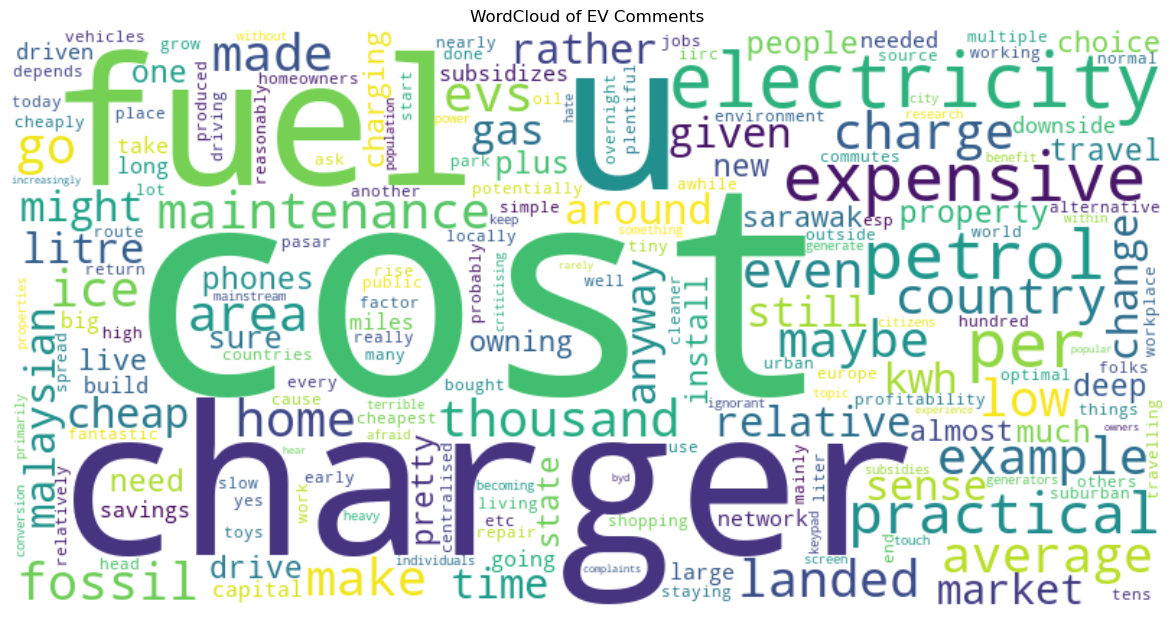

In [50]:
clean_text = ' '.join(clean_tokens)
wc = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
plt.figure(figsize=(15, 7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of EV Comments')
plt.savefig("EV_Wordcloud 1.png",dpi=300,bbox_inches='tight')
plt.show()

Scrape Reddit Thread #2

In [51]:
# Random User-Agent
ua = UserAgent()
options = uc.ChromeOptions()
options.add_argument(f"--user-agent={ua.random}")
options.add_argument("--disable-blink-features=AutomationControlled")

# Launch undetected Chrome
# These options help to avoid detection by websites that block automated browsers
# Can be changed
driver = uc.Chrome(options=options)
stealth(
    driver,
    languages=["en-US","en"],
    vendor="Google Inc.",
    platform="Win32",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
)
driver.maximize_window()

In [52]:
def human_pause(min_s=1, max_s=3):
    time.sleep(random.uniform(min_s, max_s))

In [53]:
url='https://www.reddit.com/r/kereta/comments/1gk4te4/ev_owners_what_are_your_thoughts_after_using_them/'
driver.get(url)
human_pause(3,5)

In [54]:
# Scroll and extract all comments
ev_comments = []
last_count = -1

while True:
    # Find comment blocks using scalable-text (avoid classes with colons)
    comment_blocks = driver.find_elements(By.CSS_SELECTOR, '#comment-tree-content-anchor-1gk4te4')

    comments_batch = []
    for block in comment_blocks:
        try:
            # Get all text from inside this comment block
            comment_text = block.text.strip()
            if comment_text and comment_text not in ev_comments:
                comments_batch.append(comment_text)
        except:
            continue

    # Append new batch to full list
    ev_comments.extend(comments_batch)

    print(f'Found {len(ev_comments)} comments so far...')

    # Scroll
    driver.execute_script('window.scrollBy(0, window.innerHeight * 0.8);')
    human_pause(2, 4)

    if len(ev_comments) == last_count:
        break
    last_count = len(ev_comments)

print(f'Extracted {len(ev_comments)} comments')

Found 1 comments so far...
Found 1 comments so far...
Extracted 1 comments


In [55]:
print(ev_comments)

["Comments Section\nAutoModerator\nMOD\n•\n9mo ago\n•\nUpvote\nVote\nDownvote\nAward\nShare\nreply\nweugene\n•\n9mo ago\n•\nEdited 9mo ago\nI’ve had my car since March. Mostly for city driving but have also taken it to the east coast once.\nGenerally, chargers are easily accessible on highways and many other public areas so there shouldn’t be much range anxiety if you plan to travel long distance. Our country is not big enough for it to be a major concern.\nI have 6.7k KM clocked and the app says I’ve spent about Rm760 charging. The same distance would have cost me approx RM1.4k in petrol. The numbers are approximated cos our electricity is tiered.\nDon’t buy an EV with the mindset of saving money or the planet. They’re just more efficient and convenient. I’m all for adoption but think twice if you don’t have access to a charger at your residence.\nUpvote\n15\nDownvote\nReply\nreply\nAward\nShare\nUpvote\n5\nDownvote\nreply\nAward\nShare\nUpvote\n4\nDownvote\nreply\nAward\nShare\nchunk

In [56]:
text=" ".join(ev_comments)
tokens=word_tokenize(text.lower())
stop_words=set(stopwords.words('english'))
unwanted={'ago','upvote','downvote','reply','award','share','car','cars','vehicle','ev','malaysia','ringgit'}
clean_tokens=[t for t in tokens if t.isalpha() and t not in stop_words and t not in unwanted]
print(f'Tokens after cleaning:{len(clean_tokens)}')

Tokens after cleaning:490


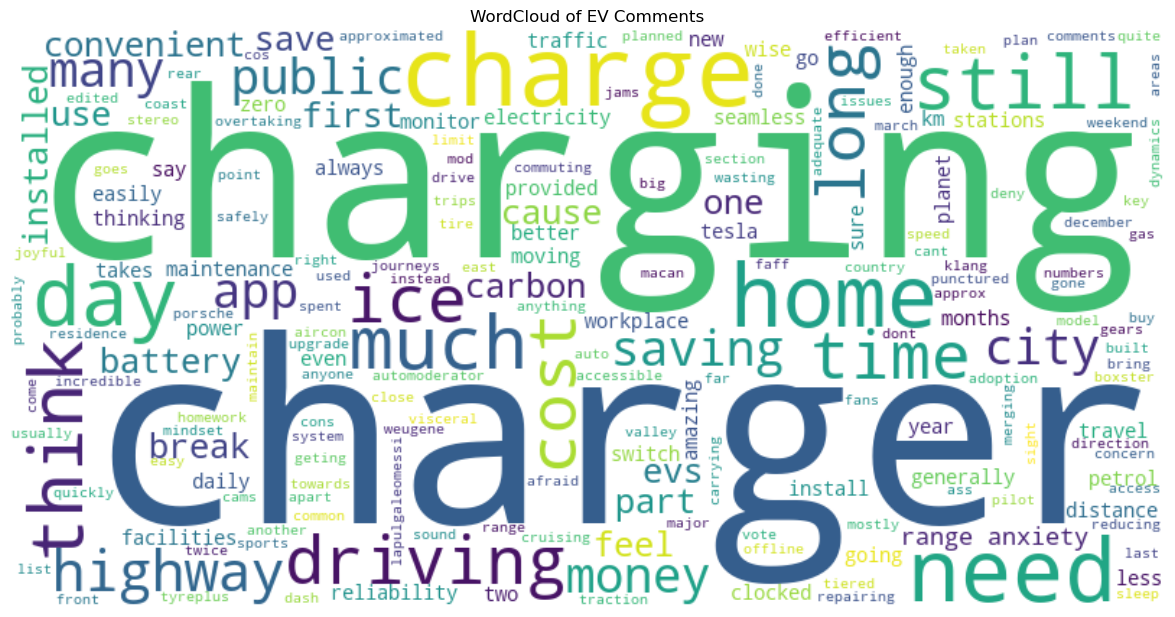

In [57]:
clean_text = ' '.join(clean_tokens)
wc = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
plt.figure(figsize=(15, 7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of EV Comments')
plt.savefig("EV_Wordcloud 2.png",dpi=300,bbox_inches='tight')
plt.show()

Scrape Reddit Thread #3

In [58]:
# Random User-Agent
ua = UserAgent()
options = uc.ChromeOptions()
options.add_argument(f"--user-agent={ua.random}")
options.add_argument("--disable-blink-features=AutomationControlled")

# Launch undetected Chrome
# These options help to avoid detection by websites that block automated browsers
# Can be changed
driver = uc.Chrome(options=options)
stealth(
    driver,
    languages=["en-US","en"],
    vendor="Google Inc.",
    platform="Win32",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
)
driver.maximize_window()

In [59]:
def human_pause(min_s=1, max_s=3):
    time.sleep(random.uniform(min_s, max_s))

In [60]:
url='https://www.reddit.com/r/kereta/comments/1kdzel2/how_long_more_will_ice_cars_stay_relevant_in/'
driver.get(url)
human_pause(3,5)

In [61]:
    # comments = driver.find_elements(By.XPATH, "//div[@data-testid='comment']") # Adjust XPath as needed
    # for comment in comments:
    #     try:
    #         author = comment.find_element(By.XPATH, ".//a[contains(@href, '/user/')]").text
    #         text = comment.find_element(By.XPATH, ".//div[@data-testid='comment-content']").text
    #         print(f"Author: {author}\nComment: {text}\n---")
    #     except Exception as e:
    #         print(f"Error extracting comment: {e}")
    #         continue

In [62]:
# Scroll and extract all comments
ev_comments = []
last_count = -1

while True:
    # Find comment blocks using scalable-text (avoid classes with colons)
    comment_blocks = driver.find_elements(By.CSS_SELECTOR, '#comment-tree-content-anchor-1kdzel2')

    comments_batch = []
    for block in comment_blocks:
        try:
            # Get all text from inside this comment block
            comment_text = block.text.strip()
            if comment_text and comment_text not in ev_comments:
                comments_batch.append(comment_text)
        except:
            continue

    # Append new batch to full list
    ev_comments.extend(comments_batch)

    print(f'Found {len(ev_comments)} comments so far...')

    # Scroll
    driver.execute_script('window.scrollBy(0, window.innerHeight * 0.8);')
    human_pause(2, 4)

    if len(ev_comments) == last_count:
        break
    last_count = len(ev_comments)

print(f'Extracted {len(ev_comments)} comments')

Found 1 comments so far...
Found 1 comments so far...
Extracted 1 comments


In [63]:
print(ev_comments)

['Comments Section\nAutoModerator\nMOD\n•\n3mo ago\n•\nchoongjoey\n•\n3mo ago\nICE cars will stay relevant for a long time as there is a huge gap in infrastructure outside major cities and highways. Not to mention car enthusiasts generally prefer ICE cars and are generally very vocal about it (doesn’t help that most EVs are not very driver focused)\nRepairability (+ skill to repair as well) and resale value is also high on concern list for most car buyers. Take a look for yourself at Mudah for used ICE vs hybrid vs EV for higher mileage and/ or older cars.\nWeary_Information_77\n•\n3mo ago\nTop 1% Commenter\nI don\'t see ev will fully take over and ice become obsolete, not in my lifetime. And thats my view for whole world, not just Malaysia. current battery technology simply use too much resource to make, and those precious metals are finite. Don\'t get me wrong I am not on hating ev bandwagon I just don\'t see how can everyone use them.\nIMO proton and perodua is dumb for not making d

In [64]:
text=" ".join(ev_comments)
tokens=word_tokenize(text.lower())
stop_words=set(stopwords.words('english'))
unwanted={'ice','hybrid','see','sees','fuel','rumah','diesel','petrol','obsolette','obsolete','make','take','use','long','ago','upvote','downvote','reply','award','share','car','cars','vehicle','vehicles','ev','malaysia','ringgit'}
clean_tokens=[t for t in tokens if t.isalpha() and t not in stop_words and t not in unwanted]
print(f'Tokens after cleaning:{len(clean_tokens)}')

Tokens after cleaning:273


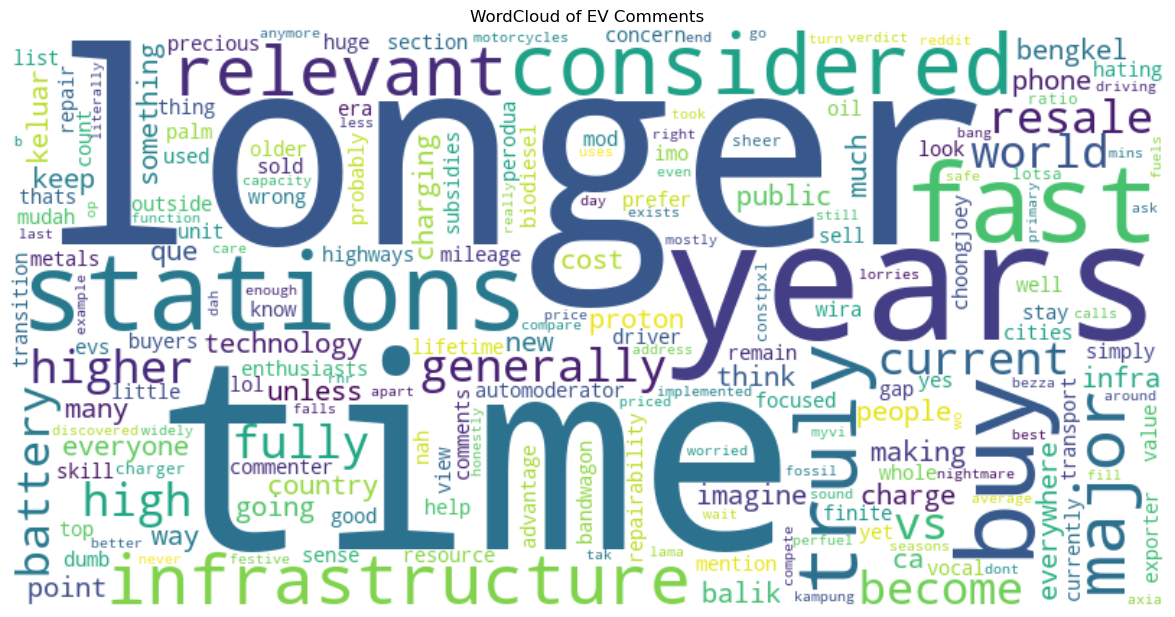

In [65]:
clean_text = ' '.join(clean_tokens)
wc = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
plt.figure(figsize=(15, 7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of EV Comments')
plt.savefig("EV_Wordcloud 3.png",dpi=300,bbox_inches='tight')
plt.show()

Scrape Reddit Thread #4

In [66]:
# Random User-Agent
ua = UserAgent()
options = uc.ChromeOptions()
options.add_argument(f"--user-agent={ua.random}")
options.add_argument("--disable-blink-features=AutomationControlled")

# Launch undetected Chrome
# These options help to avoid detection by websites that block automated browsers
# Can be changed
driver = uc.Chrome(options=options)
stealth(
    driver,
    languages=["en-US","en"],
    vendor="Google Inc.",
    platform="Win32",
    webgl_vendor="Intel Inc.",
    renderer="Intel Iris OpenGL Engine",
    fix_hairline=True,
)
driver.maximize_window()

In [67]:
def human_pause(min_s=1, max_s=3):
    time.sleep(random.uniform(min_s, max_s))

In [68]:
url='https://www.reddit.com/r/kereta/comments/1iwxo2t/ev_worth_it/'
driver.get(url)
human_pause(3,5)

In [69]:
# Scroll and extract all comments
ev_comments = []
last_count = -1

while True:
    # Find comment blocks using scalable-text (avoid classes with colons)
    comment_blocks = driver.find_elements(By.CSS_SELECTOR, '#comment-tree-content-anchor-1iwxo2t')

    comments_batch = []
    for block in comment_blocks:
        try:
            # Get all text from inside this comment block
            comment_text = block.text.strip()
            if comment_text and comment_text not in ev_comments:
                comments_batch.append(comment_text)
        except:
            continue

    # Append new batch to full list
    ev_comments.extend(comments_batch)

    print(f'Found {len(ev_comments)} comments so far...')

    # Scroll
    driver.execute_script('window.scrollBy(0, window.innerHeight * 0.8);')
    human_pause(2, 4)

    if len(ev_comments) == last_count:
        break
    last_count = len(ev_comments)

print(f'Extracted {len(ev_comments)} comments')

Found 1 comments so far...
Found 1 comments so far...
Extracted 1 comments


In [70]:
print(ev_comments)

['Comments Section\nAutoModerator\nMOD\n•\n6mo ago\n•\nUpvote\nVote\nDownvote\nAward\nShare\nreply\nkinwai\n•\n6mo ago\nAbsolutely worth it (imo). The driving experience is simply sublime.\nWhat u said is true about the cons. If u have to travel outstation, or stay in non landed, u really ought to consider the change in driving practices (to actually plan for journey etc). But they have been adding lotsa chargers on highways.\nFor me, I’ve always wanted a sports car. Can’t afford an actual one. Getting an EV is quite close to it.\nLooks good, 0-100 in 3.8s, but so much more affordable.\nUpvote\n7\nDownvote\nReply\nreply\nAward\nShare\nJrock_Forever\n•\n6mo ago\nEV don\'t save money. Sure save on petrol but electric tariff will increase as demand spikes. Worse is no RV and once broken, who knows how much it is to repair..outside shop nobody knows EV, must send back to SC.\nWant to buy EV can , but not with the mentality it will save money. It\'s pakai and buang like your smartphone.\nUp

In [71]:
text=" ".join(ev_comments)
tokens=word_tokenize(text.lower())
stop_words=set(stopwords.words('english'))
unwanted={'ice','hybrid','see','change','year','years','sees','fuel','rumah','diesel','petrol','obsolette','obsolete','make','take','use','much','long','ago','upvote','downvote','reply','award','share','car','cars','vehicle','vehicles','ev','malaysia','ringgit'}
clean_tokens=[t for t in tokens if t.isalpha() and t not in stop_words and t not in unwanted]
print(f'Tokens after cleaning:{len(clean_tokens)}')

Tokens after cleaning:365


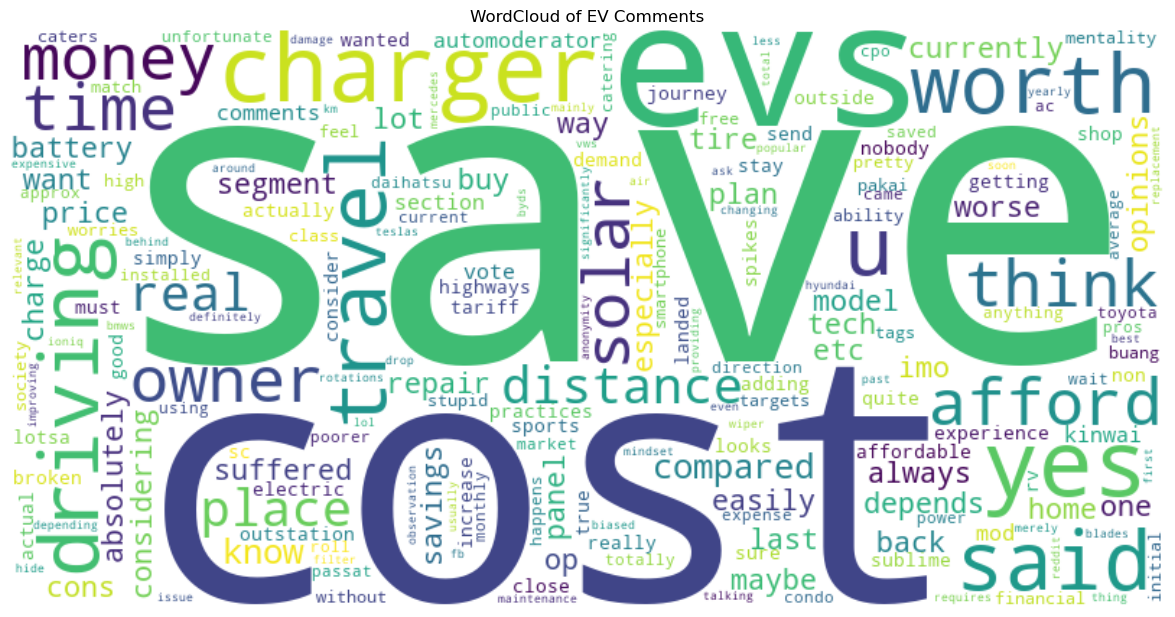

In [72]:
clean_text = ' '.join(clean_tokens)
wc = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
plt.figure(figsize=(15, 7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of EV Comments')
plt.savefig("EV_Wordcloud 4.png",dpi=300,bbox_inches='tight')
plt.show()